In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
def loadCSV(filename):
    file = filename
    if '.csv' not in filename:
        file += '.csv'
    data = pd.read_csv(file, encoding = 'ISO-8859-1')
    return data

In [44]:
csvFile = "altered_hate_speech"

In [45]:
data = loadCSV(csvFile)

In [46]:
data.head()

,tweet_text,confidence,tweet_class
0,Warning: penny boards will make you a faggot,0.6013,1
1,Fuck dykes,0.7227,2
2,@sizzurp__ @ILIKECATS74 @yoPapi_chulo @brandon...,0.5229,2
3,"""@jayswaggkillah: ""@JacklynAnnn: @jayswaggkill...",0.5184,2
4,@Zhugstubble You heard me bitch but any way I'...,0.5185,1


In [47]:
data.tail()

,tweet_text,confidence,tweet_class
14504,I'm sorry. Did I offend your white supremacist...,0.3418,0
14505,@tradethecycles Caucasian euro aryan whatever....,0.6804,0
14506,@yadavakhilesh sir a patient named aryan khan ...,1.0000,0
14507,@Iamshivachari Happy birthday bro _ÃÂ«ÃÃ_ ...,1.0000,0
14508,@Hajrahkiayni Aryan Kapoor is such a cute name...,1.0000,0


# Average Length of Tweets by Class

In [48]:
all_tweets = []
neutral_tweets = []
offensive_tweets = []
hate_tweets = []

In [49]:
for index, row in data.iterrows():
    tweet_text = row[0]
    tweet_class = row[2]
    
    if tweet_class == 0:
        neutral_tweets.append(tweet_text)
    elif tweet_class == 1:
        offensive_tweets.append(tweet_text)
    elif tweet_class == 2:
        hate_tweets.append(tweet_text)
        
    all_tweets.append(tweet_text)

In [50]:
def averageTweetLength(tweetArray):
    tweets = len(tweetArray)
    totalLen = 0
    for t in tweetArray:
        totalLen += len(t)
    return totalLen/tweets

In [51]:
all_tweets_len = averageTweetLength(all_tweets)
neutral_tweets_len = averageTweetLength(neutral_tweets)
offensive_tweets_len = averageTweetLength(offensive_tweets)
hate_tweets_len = averageTweetLength(hate_tweets)

In [52]:
all_tweets_len, neutral_tweets_len, offensive_tweets_len, hate_tweets_len

(91.17285822592874, 99.93497387957107, 84.14991728701406, 78.76240100041684)

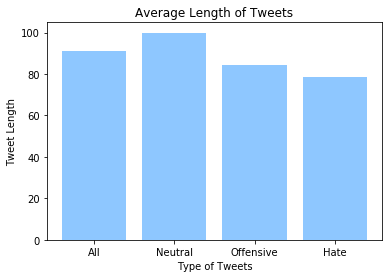

In [53]:
tweets = ('All', 'Neutral', 'Offensive', 'Hate')
y_pos = np.arange(len(tweets))
lengths = [all_tweets_len, neutral_tweets_len, offensive_tweets_len, hate_tweets_len]

plt.bar(y_pos, lengths, align='center', alpha=0.5, color='dodgerblue')
plt.xticks(y_pos, tweets)
plt.xlabel('Type of Tweets')
plt.ylabel('Tweet Length')
plt.title('Average Length of Tweets')

plt.show()

# Percentage of Tweets that include a User Tag '@'

In [54]:
def percentUserTag(tweetArray):
    tweets = len(tweetArray)
    totalTagged = 0
    for t in tweetArray:
        if '@' in t:
            totalTagged += 1
    return totalTagged/tweets * 100

In [55]:
all_tweets_tagged = percentUserTag(all_tweets)
neutral_tweets_tagged = percentUserTag(neutral_tweets)
offensive_tweets_tagged = percentUserTag(offensive_tweets)
hate_tweets_tagged = percentUserTag(hate_tweets)

In [56]:
all_tweets_tagged, neutral_tweets_tagged, offensive_tweets_tagged, hate_tweets_tagged

(41.82231718243848, 41.14654935386308, 38.27543424317618, 51.02125885785745)

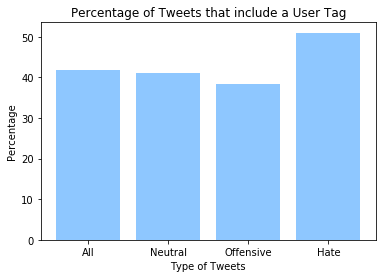

In [57]:
tweets = ('All', 'Neutral', 'Offensive', 'Hate')
y_pos = np.arange(len(tweets))
tagged = [all_tweets_tagged, neutral_tweets_tagged, offensive_tweets_tagged, hate_tweets_tagged]

plt.bar(y_pos, tagged, align='center', alpha=0.5, color='dodgerblue')
plt.xticks(y_pos, tweets)
plt.xlabel('Type of Tweets')
plt.ylabel('Percentage')
plt.title('Percentage of Tweets that include a User Tag')

plt.show()

# Percentage of Tweets that include a Link 'https://t.co/'

In [58]:
def percentLinks(tweetArray):
    tweets = len(tweetArray)
    totalTagged = 0
    for t in tweetArray:
        if 'https://t.co/' in t:
            totalTagged += 1
    return totalTagged/tweets * 100

In [59]:
all_tweets_with_links = percentLinks(all_tweets)
neutral_tweets_with_links = percentLinks(neutral_tweets)
offensive_tweets_with_links = percentLinks(offensive_tweets)
hate_tweets_with_links = percentLinks(hate_tweets)

In [60]:
all_tweets_with_links, neutral_tweets_with_links, offensive_tweets_with_links, hate_tweets_with_links

(24.184988627748293, 32.114379983502886, 16.790736145574854, 15.04793664026678)

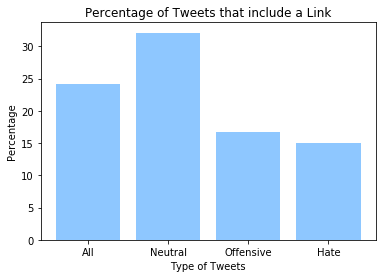

In [61]:
tweets = ('All', 'Neutral', 'Offensive', 'Hate')
y_pos = np.arange(len(tweets))
tagged = [all_tweets_with_links, neutral_tweets_with_links, offensive_tweets_with_links, hate_tweets_with_links]

plt.bar(y_pos, tagged, align='center', alpha=0.5, color='dodgerblue')
plt.xticks(y_pos, tweets)
plt.xlabel('Type of Tweets')
plt.ylabel('Percentage')
plt.title('Percentage of Tweets that include a Link')

plt.show()